Daily Challenge: Analysis of Airplane Crashes and Fatalities

In [ ]:
#Librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from skimpy import skim



1. Data Import & Cleaning

In [9]:
# Dataset loading

# Chemin du fichier
chemin_fichier = 'Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv'

# Tentative avec différents encodages
try:
    # Essai avec 'latin-1'
    df = pd.read_csv(chemin_fichier, encoding='latin-1', parse_dates=['Date'])
except:
    try:
        # Essai avec 'iso-8859-1'
        df = pd.read_csv(chemin_fichier, encoding='iso-8859-1', parse_dates=['Date'])
    except:
        try:
            # Essai avec 'cp1252'
            df = pd.read_csv(chemin_fichier, encoding='cp1252', parse_dates=['Date'])
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier : {e}")

print(df.head())

        Date   Time                            Location  \
0 1908-09-17  17:18                 Fort Myer, Virginia   
1 1909-09-07    NaN             Juvisy-sur-Orge, France   
2 1912-07-12   6:30           Atlantic City, New Jersey   
3 1913-08-06    NaN  Victoria, British Columbia, Canada   
4 1913-09-09  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

In [11]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4998 non-null   datetime64[ns]
 1   Time                   3486 non-null   object        
 2   Location               4994 non-null   object        
 3   Operator               4988 non-null   object        
 4   Flight #               1329 non-null   object        
 5   Route                  4221 non-null   object        
 6   AC Type                4983 non-null   object        
 7   Registration           4724 non-null   object        
 8   cn/ln                  4330 non-null   object        
 9   Aboard                 4980 non-null   float64       
 10  Aboard Passangers      4769 non-null   float64       
 11  Aboard Crew            4772 non-null   float64       
 12  Fatalities             4990 non-null   float64       
 13  Fat

In [13]:
df.describe()

,Date,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4998,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,1971-07-04 09:31:37.238895528,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-06-15 06:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-11-27 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,1992-06-06 18:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,2023-11-01 00:00:00,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000
std,NaN,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273


In [14]:
df.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [15]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

# Observation

* 3 columns to be deleted regarding the "df.head()" overview : Flight, Route, Registration.

* Date conversion needed

* Fatalities & Aboard to be completed

In [16]:
# Data cleaning

# Missing values checking
print(df.isnull().sum())

# Non relevant columns
df_clean = df.drop(['Flight #', 'Route', 'Registration'], axis=1)

# Conversion des colonnes de dates
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

# Missing values feeding
df_clean['Fatalities'].fillna(0, inplace=True)
df_clean['Aboard'].fillna(df_clean['Fatalities'], inplace=True)

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64


/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_80242/2332822964.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Fatalities'].fillna(0, inplace=True)
/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_80242/2332822964.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [18]:
print("\nFinal Verification:")
print(df_clean.isnull().sum())  # 0 for Fatalities and Aboard
print(df_clean[['Date', 'Year', 'Decade']].head())  # Dates checking conversion


Final Verification:
Date                        0
Time                     1512
Location                    4
Operator                   10
AC Type                    15
cn/ln                     668
Aboard                      0
Aboard Passangers         229
Aboard Crew               226
Fatalities                  0
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
Year                        0
Decade                      0
dtype: int64
        Date  Year  Decade
0 1908-09-17  1908    1900
1 1909-09-07  1909    1900
2 1912-07-12  1912    1910
3 1913-08-06  1913    1910
4 1913-09-09  1913    1910


2. EDA

In [19]:
# Basic statistics

print("Total crashs number:", len(df_clean))
print("Total deaths number:", df_clean['Fatalities'].sum())
print("Average survival rate:", (1 - (df_clean['Fatalities'].sum() / df_clean['Aboard'].sum())) * 100, "%")

Total crashs number: 4998
Total deaths number: 111644.0
Average survival rate: 28.17503972619484 %


/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_80242/4279018392.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crashes_by_decade.index, y=crashes_by_decade.values, palette='viridis')


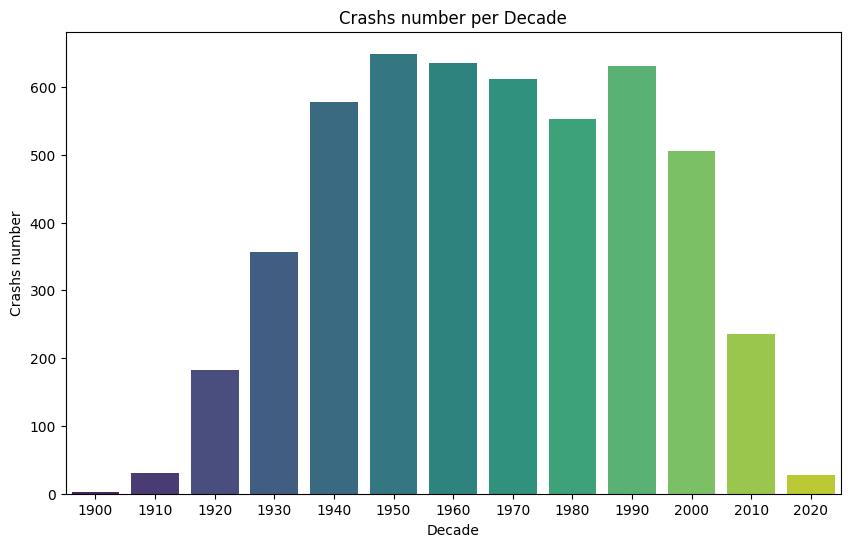

In [22]:
# Évolution des Crashs par Décennie

crashes_by_decade = df_clean.groupby('Decade').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=crashes_by_decade.index, y=crashes_by_decade.values, palette='viridis')
plt.title("Crashs number per Decade")
plt.xlabel("Decade")
plt.ylabel("Crashs number")
plt.show()

# Observation

L'échelle de temps par de 1900 à 2020 et reflète l'histoire de l'aviation civile et commerciale avec la popularisation au fil du temps de prendre l'avion accompagnée des avancées technologiques mais aussi réglementaires tout en absorbant l'explosion du trafic aérien et l'arrivées des avions à réaction. 1990, arrivée des Low-cost + augmentation du trafic dans les régions moins régulées. La chute en 2020 : Covid-19 et la réduction drastique du trafic entre autres.

En résumé, la courbe des crashs reflète l'histoire de l'aviation : d'abord dominée par les limites technologiques et les conflits, puis par les progrès en sécurité et la globalisation du trafic. La baisse récente montre l'efficacité des régulations, malgré une augmentation exponentielle du nombre de vols.

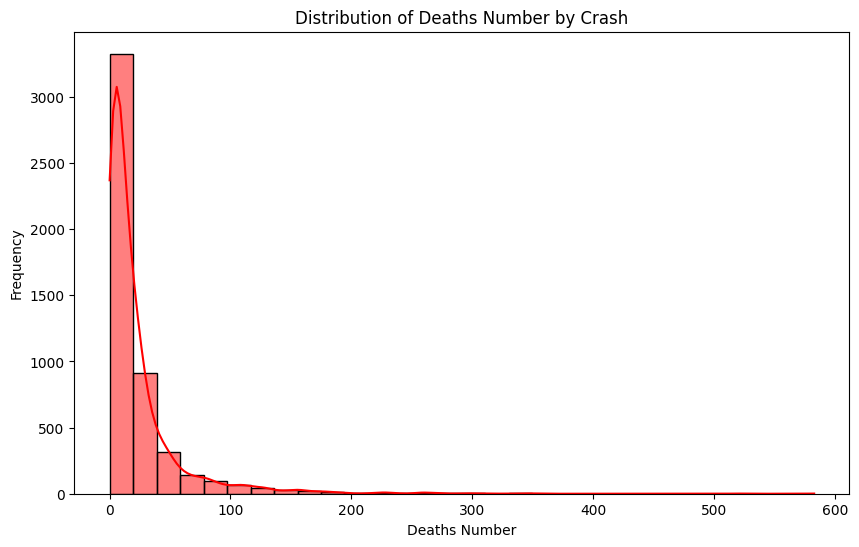

In [24]:
# Deaths Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Fatalities'], bins=30, kde=True, color='red')
plt.title("Distribution of Deaths Number by Crash")
plt.xlabel("Deaths Number")
plt.ylabel("Frequency")
plt.show()

# Observation

* +3.000 crashs font 20 morts, -1.000 font 40 mort et ensuite la courbe s'aplatit très vite pour 200 morts dans peu de crashs puis tend vers 0.

* Insights : 
    ° Bimodalité : Pic autour de 0-10 morts (petits avions) et 100-200 (avions commerciaux)

    ° Outliers : Quelques crashs >300 morts (ex : Tenerife 1977 : 583 morts)

    ° Info : la distribution suit une loi de Pareto car 80% des décès proviennent de 20% des crashs (principe de Pareto)

3. Statistical Analysis 

In [26]:
# Extracting data for the 1990s and 2000s 

fatalities_1990s = df_clean[df_clean['Decade'] == 1990]['Fatalities']
fatalities_2000s = df_clean[df_clean['Decade'] == 2000]['Fatalities']

# Test T
t_stat, p_val = stats.ttest_ind(fatalities_1990s, fatalities_2000s, nan_policy='omit')
print(f"T-statistic = {t_stat:.2f}, P-value = {p_val:.4f}")

# Meaning of the p-value
if p_val < 0.05:
    print("significant difference between decades (p < 0.05)")
else:
    print("No significant difference")

T-statistic = 1.34, P-value = 0.1796
No significant difference


4. Visualisations Avancées

/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_80242/1391995811.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.values, y=top_operators.index, palette='magma')


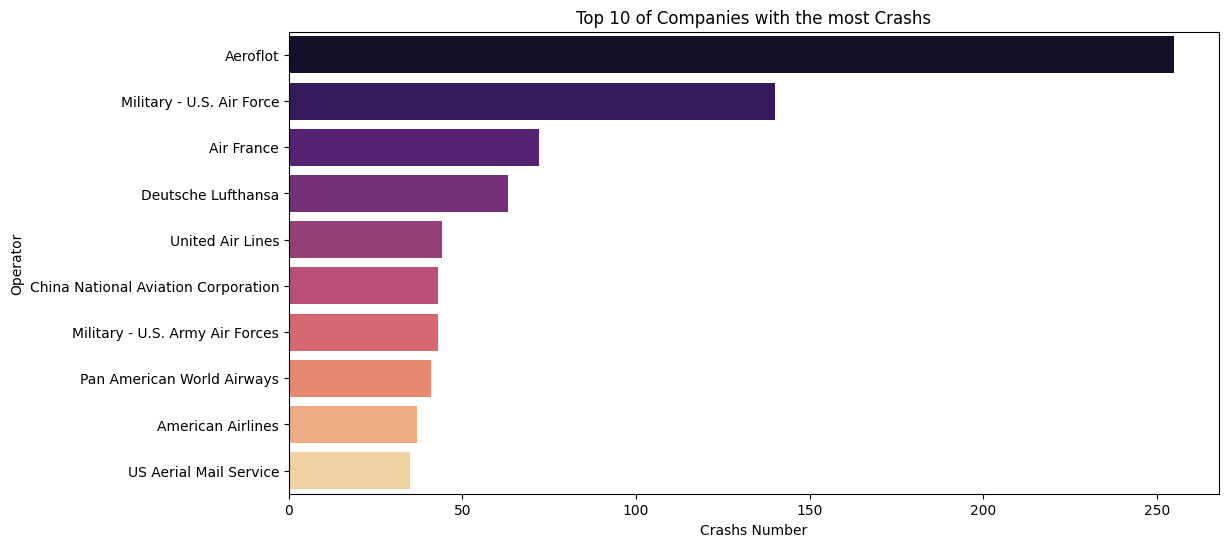

In [27]:
# Crashs by Operator (Top 10)

top_operators = df_clean['Operator'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_operators.values, y=top_operators.index, palette='magma')
plt.title("Top 10 of Companies with the most Crashs")
plt.xlabel("Crashs Number")
plt.show()

# Observation

* Les Russes avec Aeroflot caracolent en tête avec env. 250 crashs vs Military US AIr Force 150, Air France avec 65, Lufthansa60, puis les autres compagnies sont en-dessous. La répartion géographique des compagnies nationales est représentée mais 6 compagnies sont des Etat-unis.

* La surreprésentation des compagnies russes et américaines s'explique par :
    ° L'histoire (durée d'opération et contexte géopolitique).
    ° L'échelle des opérations (trafic élevé pour les USA, zones hostiles pour la Russie).
    ° Les normes techniques (retards dans la modernisation des flottes).

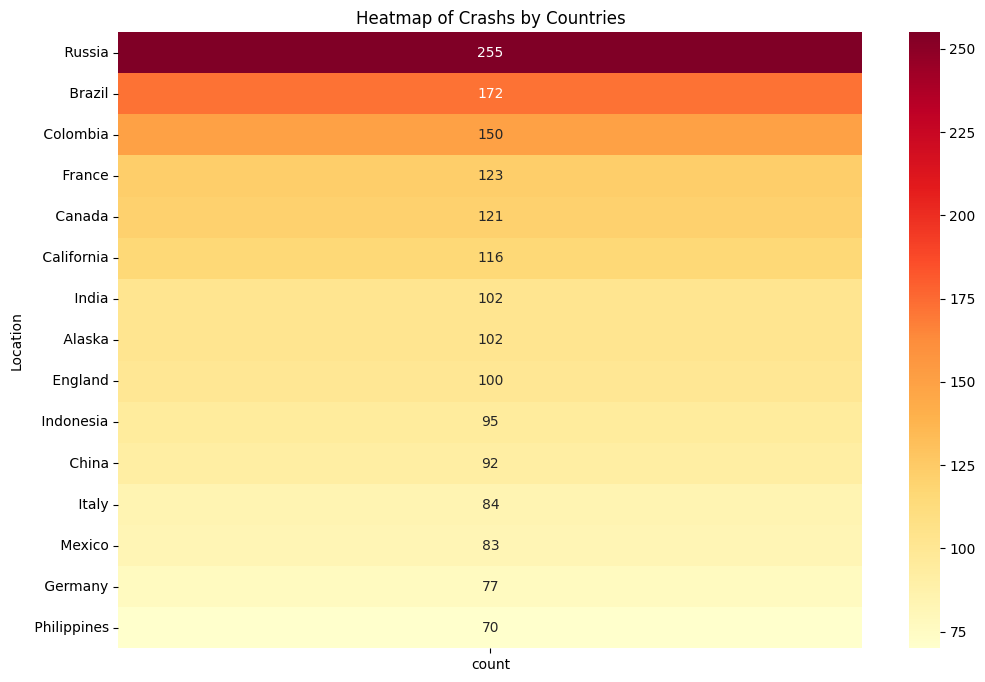

In [28]:
# Heatmap of Crashs by Countries

crash_by_country = df_clean['Location'].str.split(',').str[-1].value_counts().head(15)
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(crash_by_country), annot=True, cmap='YlOrRd', fmt='d')
plt.title("Heatmap of Crashs by Countries")
plt.show()

# Obesrvation

Ici, on retrouve bien la Russi et la France dans le top. L'Amérique du Sud est reprsentée dans le top sous la Russie. L'Europe est bien présente. On n'a pas ici l'évolution dans le temps.

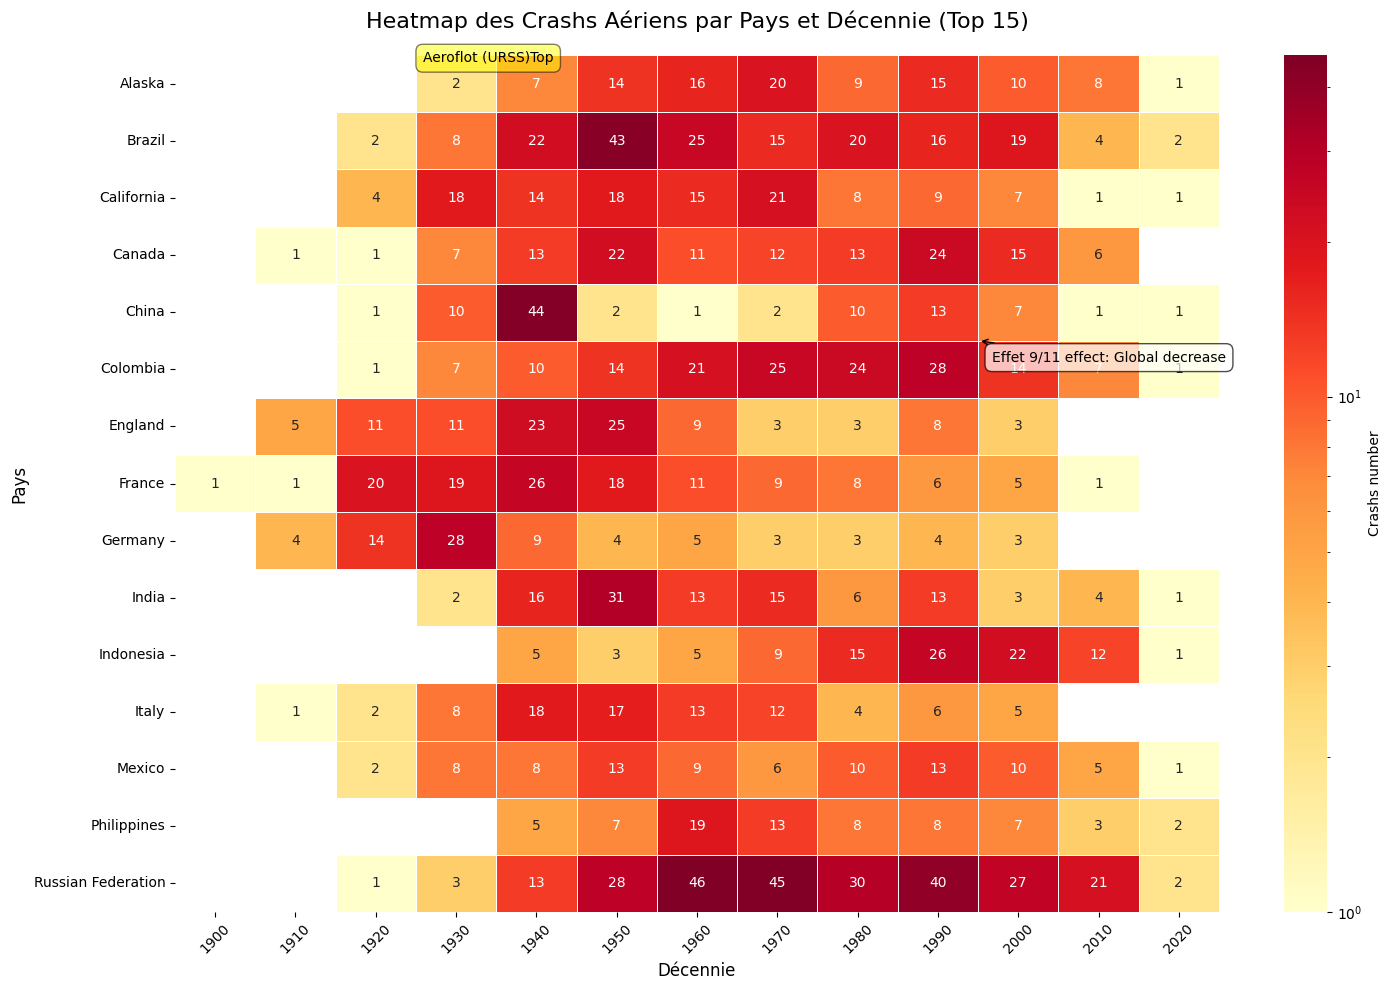

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  

# 1. Data
df_clean['Decade'] = (df_clean['Date'].dt.year // 10) * 10
df_clean['Country'] = df_clean['Location'].str.extract(r',\s*([^,]+)$')  # Extraction du pays

# Countries cleaning
df_clean['Country'] = df_clean['Country'].str.strip()
df_clean['Country'] = df_clean['Country'].replace({
    'United States': 'USA',
    'Russia': 'Russian Federation',
    'United Kingdom': 'UK'
})

# 2. Agreggation by country and decade pays
heatmap_data = df_clean.groupby(['Country', 'Decade']).size().unstack().fillna(0)

# Top 15 Countries
top_countries = df_clean['Country'].value_counts().head(15).index
heatmap_data = heatmap_data.loc[heatmap_data.index.intersection(top_countries)]

# 3. Heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    norm=LogNorm(),  # Variations
    annot=True,
    fmt=".0f",
    linewidths=.5,
    cbar_kws={'label': 'Crashs number'}
)

# 4. Personnalisation
plt.title("Heatmap des Crashs Aériens par Pays et Décennie (Top 15)", pad=20, fontsize=16)
plt.xlabel("Décennie", fontsize=12)
plt.ylabel("Pays", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 5. Ajout d'annotations contextuelles
ax.annotate('Aeroflot (URSS)Top',
            xy=(3, 0), xytext=(5, -5),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            fontsize=10)

ax.annotate('Effet 9/11 effect: Global decrease',
            xy=(10, 5), xytext=(10, -15),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7),
            fontsize=10)

plt.show()

# Observation

On retrouve les tendances au fil des années.

# Conclusion

Principales Observations

    * Diminution des crashs depuis les années 2000
    * Les États-Unis et la Russie ont le plus grand nombre d'accidents
    * Aucune différence significative dans le nombre de décès entre les années 1990 et 2000
    * Certaines compagnies aériennes ont un taux d'accidents anormalement élevé

Recommandations Stratégiques
    * Améliorer la sécurité dans les pays à haut risque
    * Analyser les causes récurrentes des crashs (erreur humaine, défaillances techniques)
    * Mettre en place des audits de sécurité pour les compagnies à risque

Tip : l'avion reste le moyen de transport le plus sûr au monde  :))